In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 12

In [2]:
df = pd.read_csv('diabetes.csv')

print("Veri setinin ilk 5 satırı:")
df.head()

Veri setinin ilk 5 satırı:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Veri seti hakkında genel bilgi:")
df.info()

print("\nVeri setinin istatistiksel özeti:")
df.describe()

Veri seti hakkında genel bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Veri setinin istatistiksel özeti:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
print("Sütunlardaki 0 değerlerin sayısı:")
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f"{column}: {(df[column] == 0).sum()} adet 0 değeri var")

Sütunlardaki 0 değerlerin sayısı:
Glucose: 5 adet 0 değeri var
BloodPressure: 35 adet 0 değeri var
SkinThickness: 227 adet 0 değeri var
Insulin: 374 adet 0 değeri var
BMI: 11 adet 0 değeri var


In [5]:
#Korelasyon 
correlation_matrix = df.corr()

print("Korelasyon Matrisi:")
correlation_matrix

Korelasyon Matrisi:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


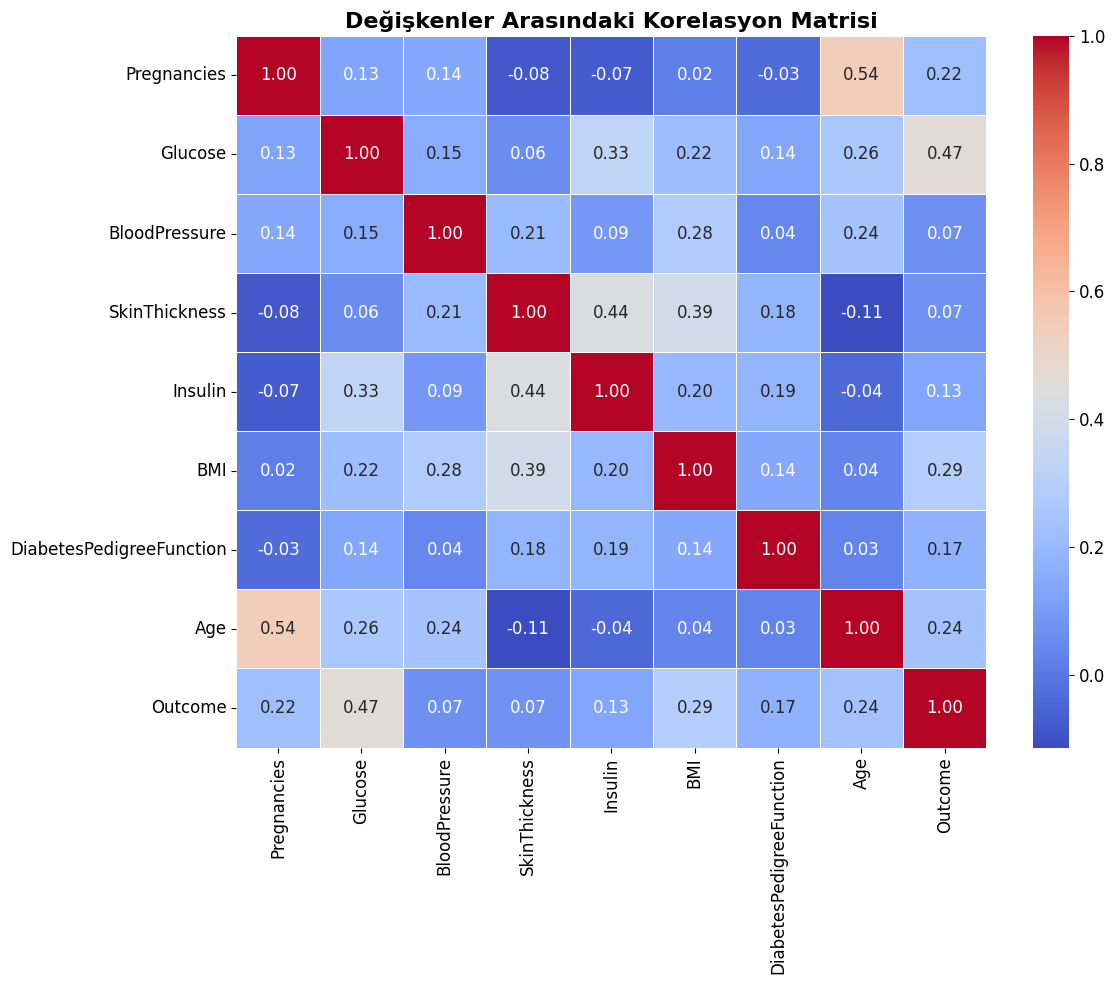

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Değişkenler Arasındaki Korelasyon Matrisi', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
outcome_correlations = correlation_matrix['Outcome'].sort_values(ascending=False)
print("Outcome (Diyabet) ile diğer değişkenler arasındaki korelasyon (büyükten küçüğe):")
outcome_correlations

Outcome (Diyabet) ile diğer değişkenler arasındaki korelasyon (büyükten küçüğe):


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

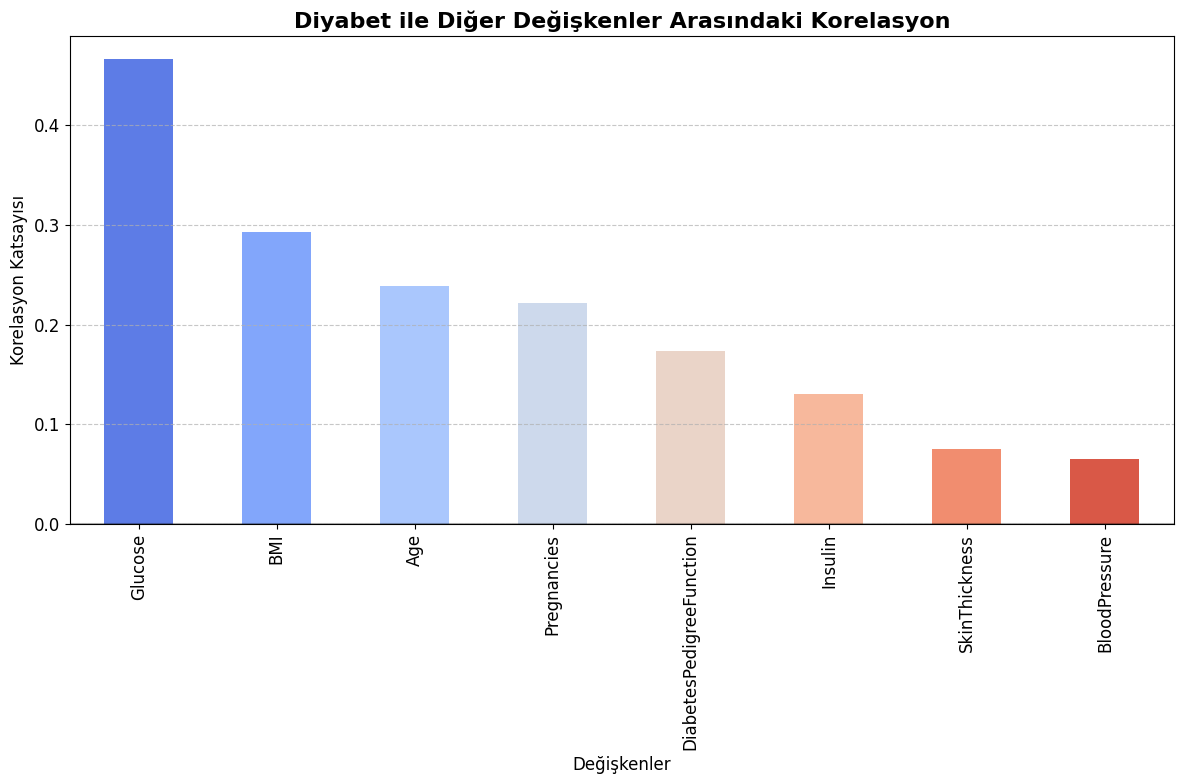

In [8]:
plt.figure(figsize=(12, 8))
outcome_correlations.drop('Outcome').plot(kind='bar', color=sns.color_palette("coolwarm", len(outcome_correlations)-1))
plt.title('Diyabet ile Diğer Değişkenler Arasındaki Korelasyon', fontsize=16, fontweight='bold')
plt.xlabel('Değişkenler', fontsize=12)
plt.ylabel('Korelasyon Katsayısı', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Çiftler grafiği (Pairplot) oluşturuluyor...


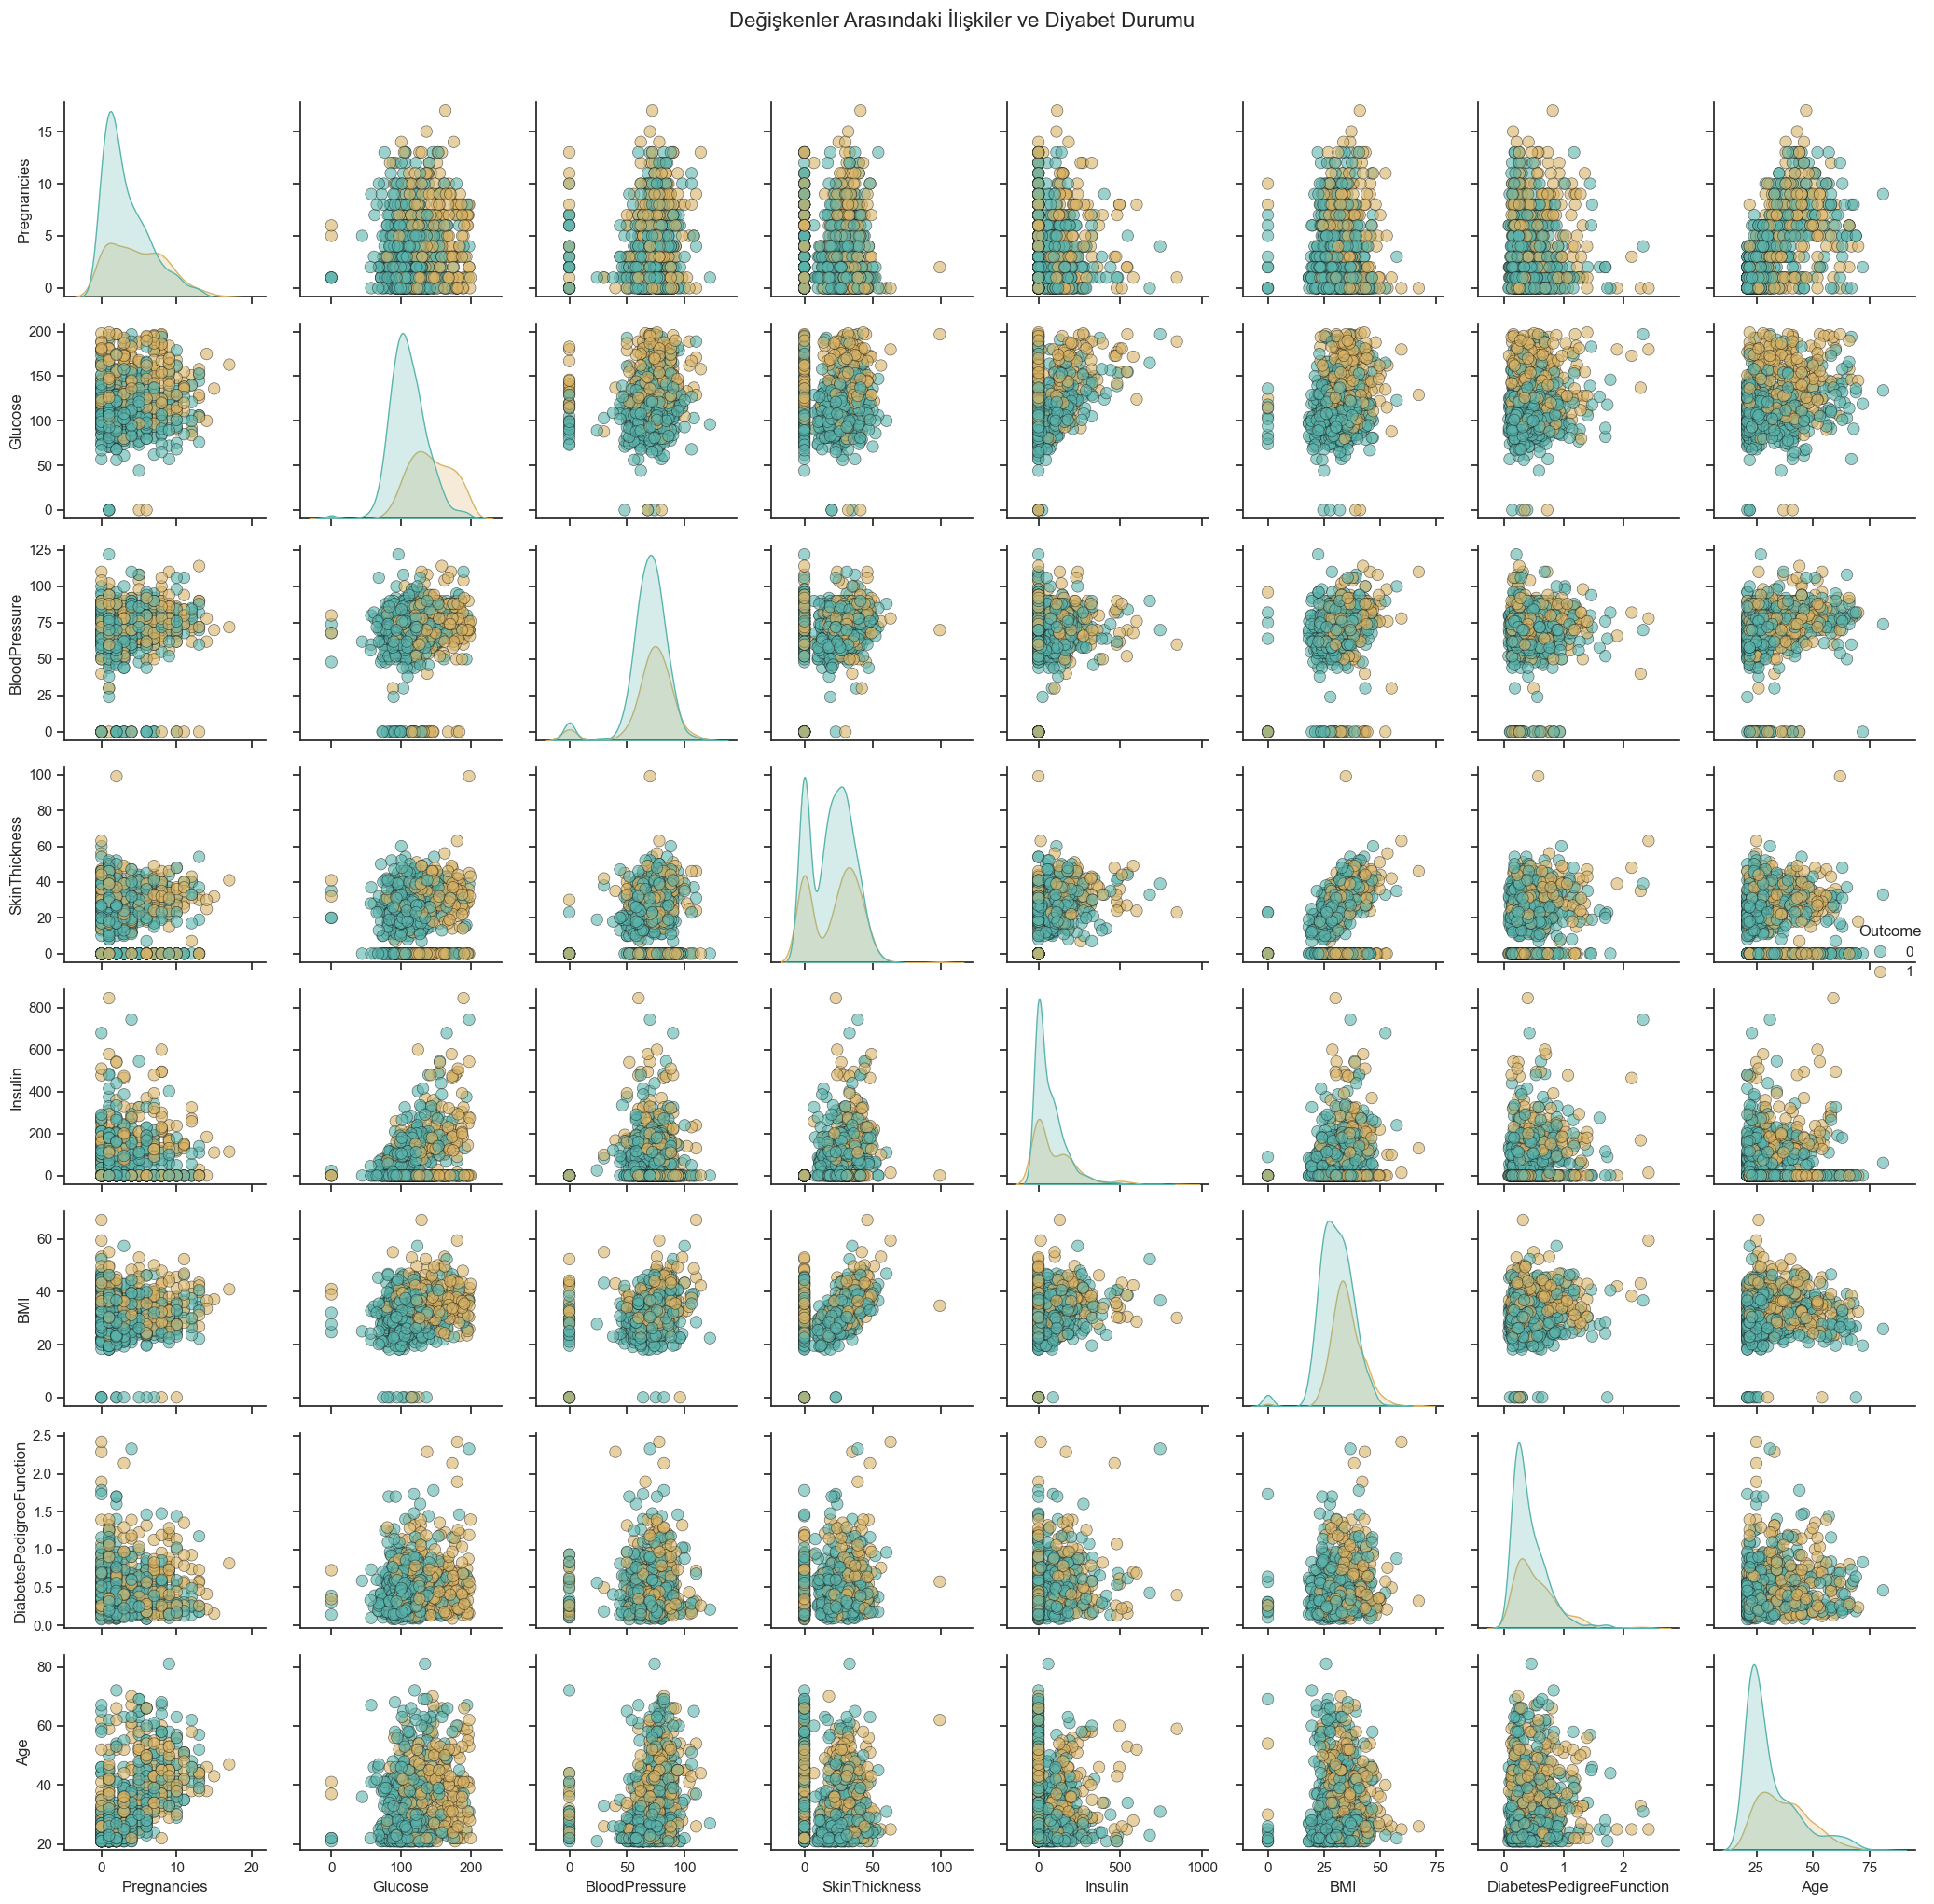

In [9]:
print("Çiftler grafiği (Pairplot) oluşturuluyor...")
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue='Outcome', palette={0: "#5ab4ac", 1: "#d8b365"}, 
                        diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k', 'linewidth': 0.5})
pairplot.fig.suptitle('Değişkenler Arasındaki İlişkiler ve Diyabet Durumu', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

C:\Users\tarik\AppData\Local\Temp\ipykernel_8248\3695152801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=["#5ab4ac", "#d8b365"])
C:\Users\tarik\AppData\Local\Temp\ipykernel_8248\3695152801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=["#5ab4ac", "#d8b365"])
C:\Users\tarik\AppData\Local\Temp\ipykernel_8248\3695152801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette=["#5ab4ac", "#d8b365"])
C:\Users\tarik\A

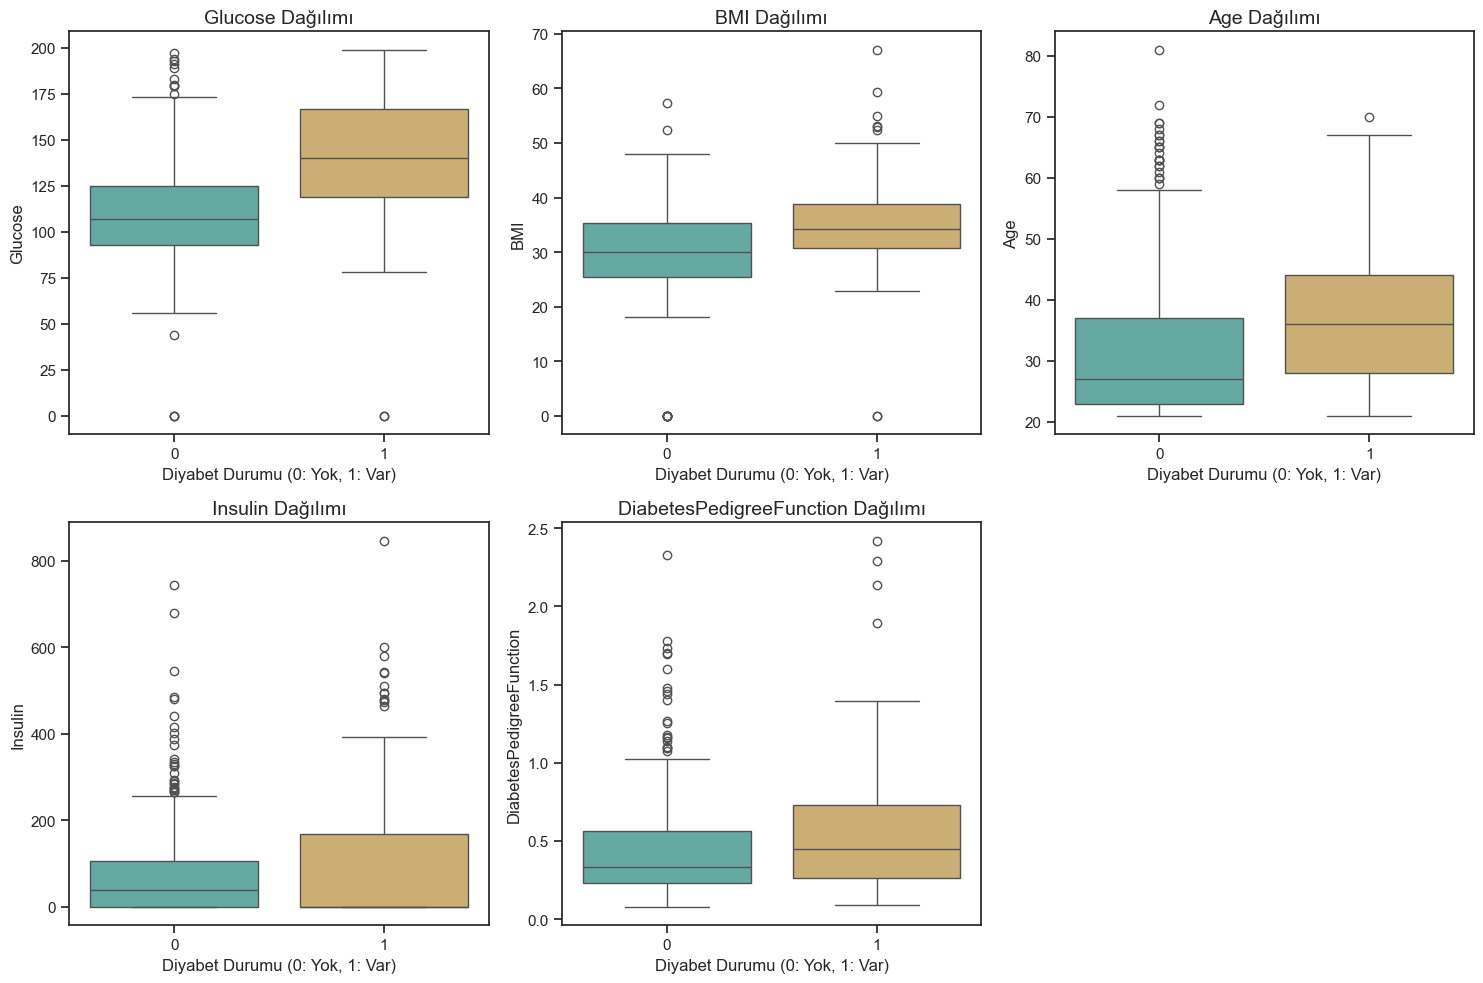

In [10]:
important_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i+1)
    # Boxplot oluşturma
    sns.boxplot(x='Outcome', y=feature, data=df, palette=["#5ab4ac", "#d8b365"])
    plt.title(f'{feature} Dağılımı', fontsize=14)
    plt.xlabel('Diyabet Durumu (0: Yok, 1: Var)', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
with open('correlation_analysis.txt', 'w') as f:
    f.write("PIMA INDIANS DIABETES DATABASE KORELASYON ANALİZİ\n")
    f.write("="*50 + "\n\n")
    
    f.write("Korelasyon Matrisi:\n")
    f.write(str(correlation_matrix) + "\n\n")
    
    f.write("Diyabet (Outcome) ile diğer değişkenler arasındaki korelasyon (büyükten küçüğe):\n")
    f.write(str(outcome_correlations) + "\n\n")
    
    f.write("Analiz Sonuçları:\n")
    f.write("-"*30 + "\n")
    f.write("1. Diyabet ile en yüksek korelasyona sahip değişkenler:\n")
    
    top_correlations = outcome_correlations.drop('Outcome').abs().sort_values(ascending=False).head(3)
    for var, corr in zip(top_correlations.index, top_correlations.values):
        original_corr = outcome_correlations[var]
        f.write(f"   - {var}: {original_corr:.3f} - {'Pozitif' if original_corr > 0 else 'Negatif'} korelasyon\n")
    
    f.write("\n2. Değişkenler arasındaki diğer önemli korelasyonlar:\n")
    
    high_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5 and correlation_matrix.columns[i] != 'Outcome' and correlation_matrix.columns[j] != 'Outcome':
                high_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
    
    high_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    for var1, var2, corr in high_correlations:
        f.write(f"   - {var1} ve {var2}: {corr:.3f} - {'Pozitif' if corr > 0 else 'Negatif'} korelasyon\n")
    
    f.write("\n3. Sonuç ve Değerlendirme:\n")
    f.write("   Korelasyon analizi sonucunda, diyabet ile en güçlü ilişkiye sahip değişkenler belirlenmiştir.\n")
    f.write("   Bu değişkenler, diyabet risk faktörlerini anlamak ve tahmin modelleri geliştirmek için önemlidir.\n")
    f.write("   Yüksek korelasyona sahip değişkenler, diyabet tahmini için daha fazla bilgi sağlayabilir.\n")

print("\nKorelasyon analizi tamamlandı. Sonuçlar 'correlation_analysis.txt' dosyasına kaydedildi.")
print("Görselleştirmeler Jupyter Notebook içinde gösterilmiştir.")


Korelasyon analizi tamamlandı. Sonuçlar 'correlation_analysis.txt' dosyasına kaydedildi.
Görselleştirmeler Jupyter Notebook içinde gösterilmiştir.
